## ANLY 590 Assignment1
### Jon Kang

#### 1.1
##### Use LASSO regression to predict Salary from the other numeric predictors.
##### Create a visualization of the coefficient trajectories. Comment on which are the
##### final three predictors that remain in the model. Use cross-validation to find the
##### optimal value of the regularization penality. How many predictors are left in
##### that model?

In [1]:
### Load Libraries and modules
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale

%matplotlib inline


In [2]:
### Load data from github
url="https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv"
df=pd.read_csv(url)

In [3]:
print(df.shape)
df.describe()

(322, 21)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
### Start data cleaning

### 1. Drop column with name and non-numeric predictors
df.drop('Unnamed: 0',
  axis='columns', inplace=True)
df.drop('League',
  axis='columns', inplace=True)
df.drop('Division',
  axis='columns', inplace=True)
df.drop('NewLeague',
  axis='columns', inplace=True)

In [5]:
### 2. Count NA and Determine to replace or drop
df.isna().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [6]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [7]:
### Found out the Salary has NAs,
### Salary is std with 451.118681 so will fill NA with median values
df['Salary'].fillna(425, inplace=True)
df.isna().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [8]:
y = df['Salary']
df = df.drop(['Salary'], axis=1)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2115)
print(X_train.shape); print(X_test.shape)

(225, 16)
(97, 16)


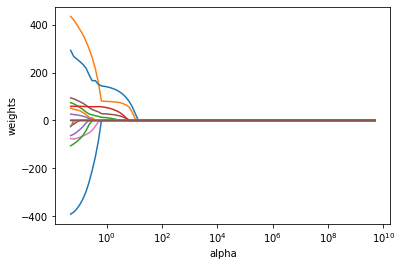

In [9]:
# LASSO model start
model_lasso = Lasso(normalize=True)
model_lasso_coefs = []

alphas = 10 ** np.linspace(10, -1, 100) * 0.5

for alpha in alphas:
    model_lasso.set_params(alpha=alpha)
    model_lasso.fit(scale(X_train), y_train)
    model_lasso_coefs.append(model_lasso.coef_)

### Print visualization of the coefficient trajectories with LASSO
ax = plt.gca()
ax.plot(alphas, model_lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [10]:
### Find final three predictors that remain in the model
model_lasso = Lasso(normalize=True)
model_lasso.fit(X, y) 

### Show predictors left in model
coeff_df = pd.DataFrame(model_lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df

### According to the dataframe, I would choose three predictors as
### 1. Walks, 2. Hits and 3. RBI 

,Coefficient
AtBat,-0.000000
Hits,1.295056
HmRun,0.000000
Runs,0.000000
RBI,0.481377
Walks,2.141283
Years,-0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,0.000000


In [11]:
### Use cross-validation to find the optimal value of the regularization penality
model_lasso_cv = LassoCV(cv=10, max_iter=100000, normalize=True)
model_lasso_cv.fit(X, y)
model_lasso.set_params(alpha=model_lasso_cv.alpha_)
model_lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, model_lasso_cv.predict(X_test))
print('\nThe optimal value of the penalty with Lasso Cross Validation is')
print(model_lasso_cv.alpha_)
print('\nLasso MSE with best Alpha is')
print(lasso_mse)

### Show predictors left in model
coeff_df_cv = pd.DataFrame(model_lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df_cv

### According to the dataframe, 
### there are 11 predictors 
### 1.AtBat, 2.Hits, 3.HmRun, 4.RBI, 5.Walks, 6.Years 
### 7.CRuns, 8.CRBI, 9.CWalks, 10.PutOuts and 11.Assists
### are left in the model


The optimal value of the penalty with Lasso Cross Validation is
0.12292599746608651

Lasso MSE with best Alpha
84385.58867016887


,Coefficient
AtBat,-2.200237
Hits,8.031968
HmRun,5.698156
Runs,-0.000000
RBI,-1.237975
Walks,3.543775
Years,-13.335198
CAtBat,-0.000000
CHits,0.000000
CHmRun,0.000000


#### 1.2
##### Repeat with Ridge Regression. Visualize coeffecient trajectories. 
##### Use crossvalidation to find the optimal vaule of the regularization penalty.

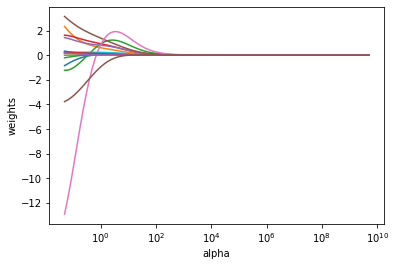

In [12]:
# Ridge Regression

model_ridge = Ridge(normalize=True)
model_ridge_coefs = []

for alpha in alphas:
    model_ridge.set_params(alpha=alpha)
    model_ridge.fit(X, y)
    model_ridge_coefs.append(model_ridge.coef_)

### Print visualization of the coefficient trajectories with Ridge Regression
ax = plt.gca()
ax.plot(alphas, model_ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()


In [13]:
### Find final three predictors that remain in the model
ridge_alpha = Ridge(normalize=True)
ridge_alpha.fit(X_train, y_train)
pred2 = ridge_alpha.predict(X_test)
ridge_mse = mean_squared_error(y_test, pred2)

### Show predictors left in model
coeff_df = pd.DataFrame(ridge_alpha.coef_, X.columns, columns=['Coefficient'])
coeff_df

### According to the model, I would choose three predictors as
### 1. HmRun, 2. Walks and 3. Runs 

,Coefficient
AtBat,0.069223
Hits,0.697469
HmRun,1.434744
Runs,0.982210
RBI,0.592031
Walks,1.131328
Years,0.824896
CAtBat,0.008704
CHits,0.041642
CHmRun,0.133755


In [14]:
### Use cross-validation to find the optimal value of the regularization penality
model_ridge_cv = RidgeCV(scoring='neg_mean_squared_error', normalize=True)
model_ridge_cv.fit(X, y)

print('\nThe optimal value of the penalty with Ridge Cross Validation is')
print(model_ridge_cv.alpha_)

model_ridge.set_params(alpha=model_ridge_cv.alpha_)
model_ridge.fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, model_ridge.predict(X_test))

print('\nRidge MSE with best Alpha is')
print(ridge_mse)

### Show predictors left in model
coeff_df_ridge = pd.DataFrame(model_ridge_cv.coef_, X.columns, columns=['Coefficient'])
coeff_df_ridge

### According to the dataframe, 
### All predictors are left in the model


The optimal value of the penalty with Ridge Cross Validation is
0.1

Ridge MSE with best Alpha is
99340.94835035743


,Coefficient
AtBat,-0.482556
Hits,1.597996
HmRun,-1.049654
Runs,1.504203
RBI,1.243561
Walks,2.593012
Years,-9.359245
CAtBat,0.004463
CHits,0.107666
CHmRun,0.238297


#### 2
##### Explain in your own words the bias-variance tradeoff. 
##### What role does regularization play in this tradeoff? 
##### Make reference to your findings in number (1) to describe models of high/low bias and variance.

###### The bias-variance tradeoff is a relationship with Bias and Variance within the data when higher the bias is the lower the variance and vice versa. By adjusting this tradeoff we could make better model because it helps to avoid over-fitting and under-fitting.

###### Regularization is one way to prevent overfitting. Since the regularized model is not sensitive to the data, errors due to variance can be reduced.

###### Regularization is one way to prevent overfitting. Since the regularized model is not sensitive to the data, errors due to variance can be reduced.

###### Both 1.1 model and 1.2 model without regularization penality has low bias and high variance, with regularization penality has high bias and low variance